In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP import load_data
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [2]:
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [3]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)

In [4]:
dir()

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'cf',
 'download_plotlyjs',
 'exit',
 'get_ipython',
 'init_notebook_mode',
 'iplot',
 'load_data',
 'np',
 'open',
 'pd',
 'plot',
 'plt',
 'poly',
 'quit',
 'sm',
 'sns',
 'subplots',
 'summarize']

In [5]:
Boston=pd.read_csv(r'C:\Users\tegae\Documents\ML\Datasets\Boston.csv')

In [6]:
Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [7]:
Auto=load_data('Auto')

In [8]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [10]:
Boston.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'lstat', 'medv'],
      dtype='object')

In [13]:
X= pd.DataFrame({'intercept':np.ones(Boston.shape[0]),'lstat':Boston['lstat']})

In [14]:
X

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


In [15]:
Y=Boston['medv']

In [16]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [17]:
model=sm.OLS(Y,X)
results=model.fit()

In [19]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [20]:
design=MS(['lstat'])
design=design.fit(Boston)
x=design.transform(Boston)
x.head()

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [21]:
#Another Option
design=MS(['lstat'])
x=design.fit_transform(Boston)

In [22]:
x

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 22 May 2025   Prob (F-statistic):           5.08e-88
Time:                        11:56:12   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [25]:
new_df=pd.DataFrame({'lstat':[5,7,10]})
x_new=design.transform(new_df)


In [26]:
x_new

,intercept,lstat
0,1.0,5
1,1.0,7
2,1.0,10


In [27]:
new_pred=results.get_prediction(x_new)
new_pred.predicted_mean

array([29.80359411, 27.9034954 , 25.05334734])

In [28]:
new_pred.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [27.21082406, 28.59616674],
       [24.47413202, 25.63256267]])

In [29]:
new_pred.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [15.67187421, 40.1351166 ],
       [12.82762635, 37.27906833]])

In [31]:
def abline(ax, b, m):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)

In [63]:
def abline(ax, b, m, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)


C:\Users\tegae\AppData\Local\Temp\ipykernel_19292\2616703611.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\tegae\AppData\Local\Temp\ipykernel_19292\2616703611.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



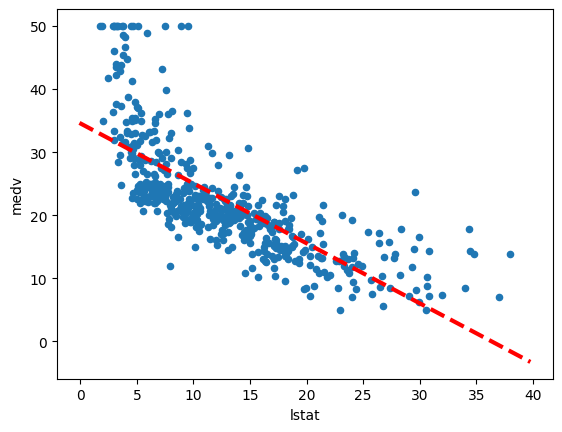

In [64]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
results.params[0],
results.params[1],
'r--',
linewidth=3)

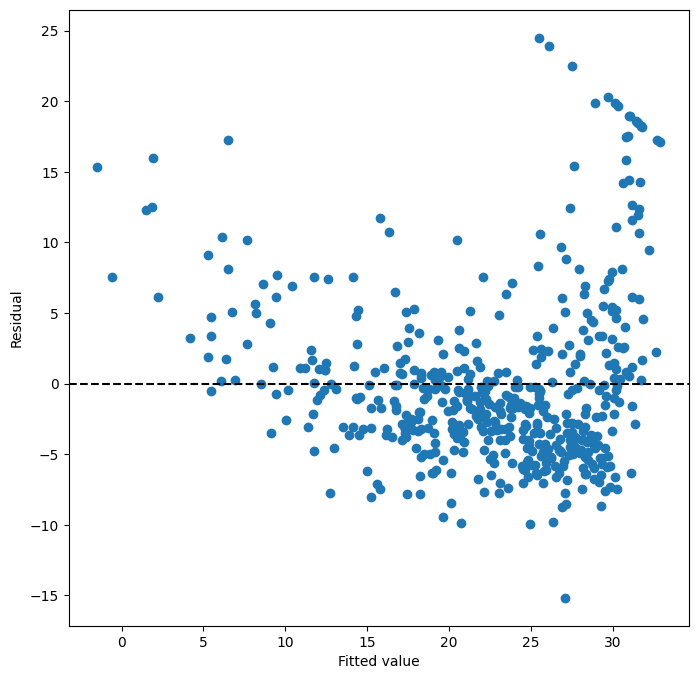

In [34]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

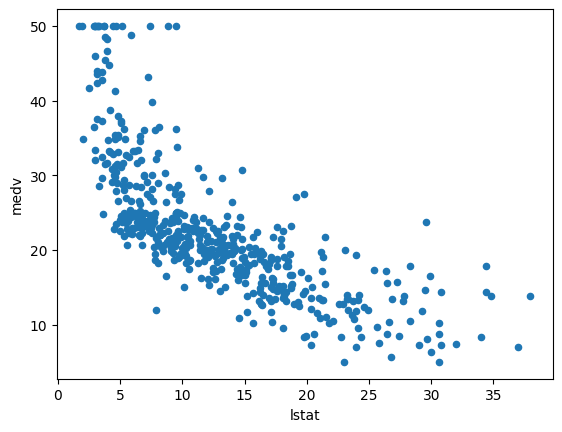

In [35]:
ax = Boston.plot.scatter('lstat', 'medv')

In [65]:
def abline(ax, b, m, *args, **kwargs):
    x_lim= ax.get_xlim()
    y_lim= [b+m*x_lim[0],b+m*x_lim[1]]
    ax.plot(x_lim,y_lim,*args,**kwargs)

C:\Users\tegae\AppData\Local\Temp\ipykernel_19292\3315886421.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



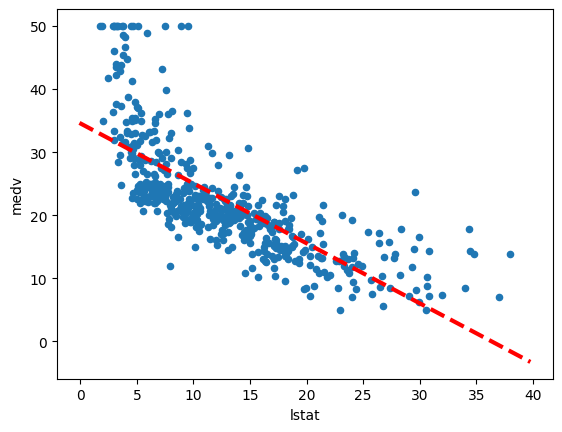

In [69]:
ax= Boston.plot.scatter('lstat','medv')
abline(ax,results.params[0],results.params[1],'r--',linewidth=3)

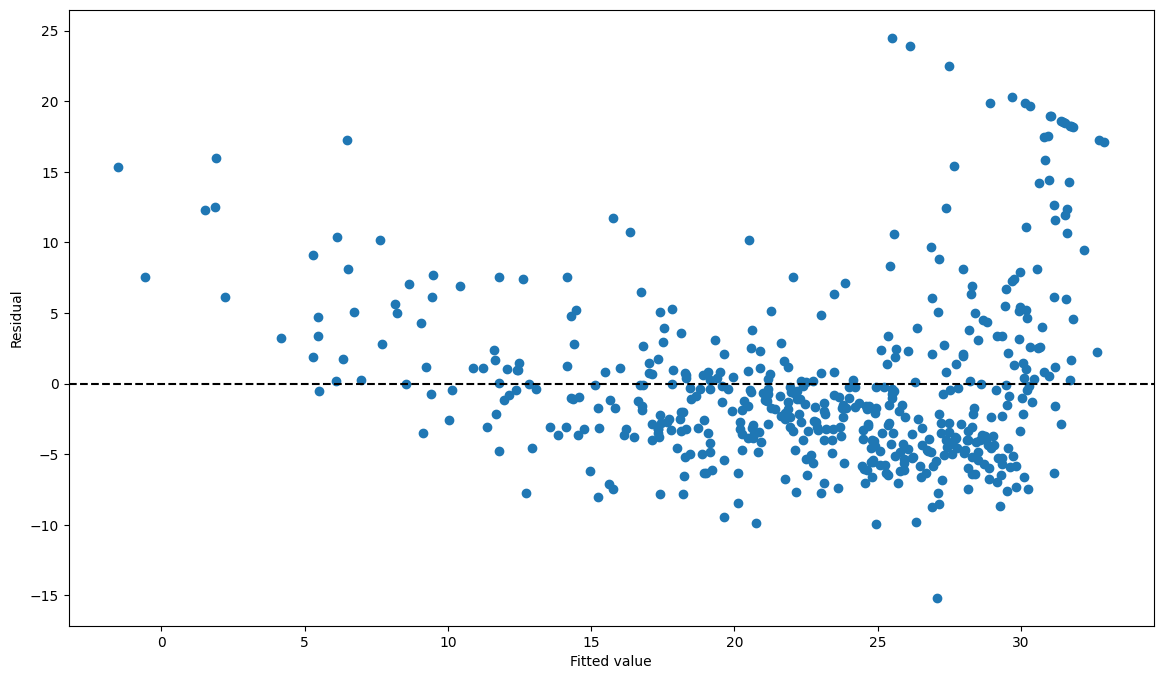

In [78]:
ax=subplots(figsize=(14,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

374

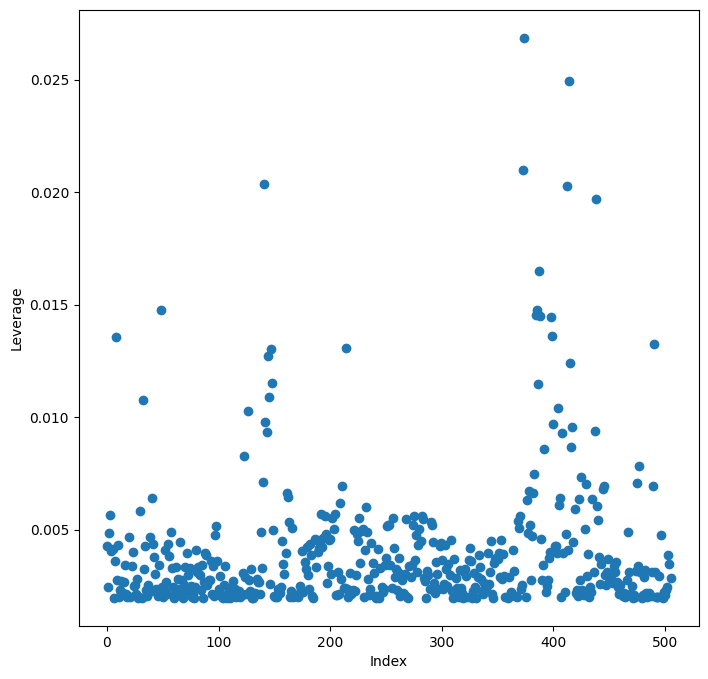

In [79]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [80]:
Housing=pd.read_csv(r'C:\Users\tegae\Documents\Python Tutorials\Python Bootcamp Files\Refactored_Py_DS_ML_Bootcamp-master\11-Linear-Regression\USA_Housing.csv')

In [81]:
Housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [82]:
Housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [87]:
X= Housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [88]:
y=Housing['Price']

In [85]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lm= LinearRegression()

In [95]:
lm.fit(X_train,y_train)

LinearRegression()

In [96]:
print(lm.intercept_)

-2640159.7968526953


In [98]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [99]:
predictions=lm.predict(X_test)

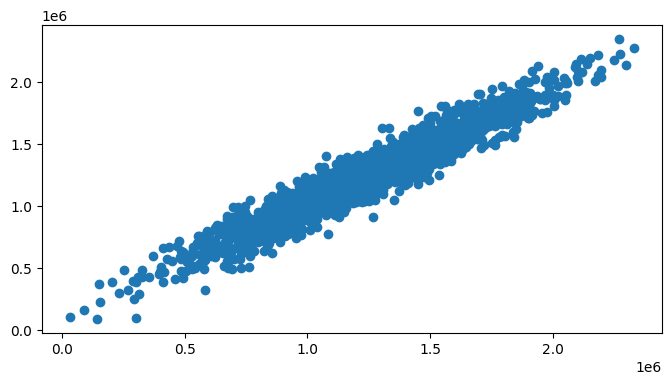

In [102]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,predictions)

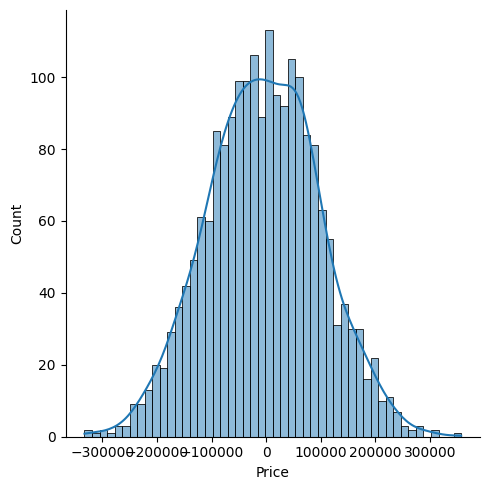

In [105]:
sns.displot((y_test-predictions), kde=True, bins=50)

In [106]:
from sklearn import metrics

In [107]:
MAE= metrics.mean_absolute_error(y_test,predictions)
MSE= metrics.mean_squared_error(y_test,predictions)
RMSE= metrics.root_mean_squared_error(y_test, predictions)

In [108]:
Errors=['MAE','MSE','RMSE']

In [122]:
Loss_Functions=pd.DataFrame(Errors,index=['MAE','MSE','RMSE'])

In [123]:
Loss_Functions

,0
MAE,8.228822e+04
MSE,1.046096e+10
RMSE,1.022788e+05


In [124]:
y_test.shape

(2000,)